In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U insightface onnxruntime opencv-python-headless numpy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 93.1 MB/s eta 0:00:00
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064923 sha256=fca0ae476f025a77b5a4baf94b57eac89282a3bf880ce375a1f691c2611e9c87
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be83

In [ ]:
pip uninstall -y numpy

Found existing installation: numpy 2.2.3
Uninstalling numpy-2.2.3:
  Successfully uninstalled numpy-2.2.3


In [ ]:
pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.8 MB/s eta 0:00:00


In [ ]:
import insightface
from insightface.app import FaceAnalysis
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load ArcFace model
app = FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 75044.87KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_face_embedding(image_path):
    """Extracts face embedding from an image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = app.get(img)
    if faces:
        return faces[0].normed_embedding  # Return first detected face's embedding
    return None

def get_faces_from_group(image_path):
    """Extracts all faces and embeddings from a group photo."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = app.get(img)
    face_data = []

    for face in faces:
        bbox = face.bbox.astype(int)  # Face bounding box
        embedding = face.normed_embedding  # 512-D embedding
        face_data.append((bbox, embedding))

    return img, face_data

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get face embeddings for all faces in an image
def get_faces_from_group(image_path):
    """Extracts all faces and embeddings from a group photo."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = app.get(img)
    face_data = []

    for face in faces:
        bbox = face.bbox.astype(int)  # Face bounding box
        embedding = face.normed_embedding  # 512-D embedding
        face_data.append((bbox, embedding))

    return img, face_data

# Function to get face embedding and cropped face image
def get_face_embedding_and_image(image_path):
    """Extracts face embedding and the cropped face image."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = app.get(img)

    if faces:
        bbox = faces[0].bbox.astype(int)
        cropped_face = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        return faces[0].normed_embedding, cropped_face
    return None, None

# Function to match multiple faces and visualize results
def match_faces(group_image_path, reference_images, threshold=0.5):
    """Matches multiple faces in a group image against multiple reference faces and visualizes results."""
    ref_data = []

    for ref_image in reference_images:
        ref_embedding, ref_face = get_face_embedding_and_image(ref_image)
        if ref_embedding is not None:
            ref_data.append((ref_embedding, ref_face))

    if not ref_data:
        print("No faces detected in reference images.")
        return None

    img, faces_data = get_faces_from_group(group_image_path)
    matched_faces = []

    plt.figure(figsize=(10, len(ref_data) * 5))

    for idx, (ref_embedding, ref_face) in enumerate(ref_data):
        for bbox, embedding in faces_data:
            similarity = cosine_similarity([ref_embedding], [embedding])[0][0]
            if similarity >= threshold:
                matched_faces.append((bbox, similarity))
                cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
                cv2.putText(img, f"Sim: {similarity:.2f}", (bbox[0], bbox[1]-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                # Plot reference and matched face side by side
                matched_face = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                plt.subplot(len(ref_data), 2, idx * 2 + 1)
                plt.imshow(ref_face)
                plt.title("Reference Face")
                plt.axis('off')

                plt.subplot(len(ref_data), 2, idx * 2 + 2)
                plt.imshow(matched_face)
                plt.title(f"Matched Face (Sim: {similarity:.2f})")
                plt.axis('off')
                break  # Stop checking once a match is found

    plt.show()
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Detected Faces in Group Image")
    plt.show()

    return matched_faces

Files in folder: ['/content/faces/HP1_12240520_Dhananjay_Abbot_pic - DHANANJAY ABBOT.jpg', '/content/faces/HP1_12241290_Pradeep_J.jpg', '/content/faces/HP1_12241430_RAJ_MOHAMMAD - RAJ MOHAMMAD.jpg', '/content/faces/HP1_12342060_Sidhesh_Kumar_Patra_Photo.pdf - SIDHESH KUMAR PATRA.jpg', '/content/faces/HP1_M24MT006_R_C_Yajour_Kichenamourty - R C YAJOUR KICHENAMOURTY.jpeg', '/content/faces/HP2_12240360_HariCharanGoud_B_img - B HARI CHARAN GOUD.jpg', '/content/faces/HP2_12241920_Ujjwal_Raj_img - UJJWAL RAJ.jpg', '/content/faces/HP3_12241520_Rohan_Kumar_Mishra - ROHAN KUMAR MISHRA.jpg', '/content/faces/HP3_12241910_UDAY_BHARDWAJ_pic - Uday Bhardwaj.jpeg', '/content/faces/HP3_12242000_Vedansh_Sharma_pic - VEDANSH SHARMA.jpeg']


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


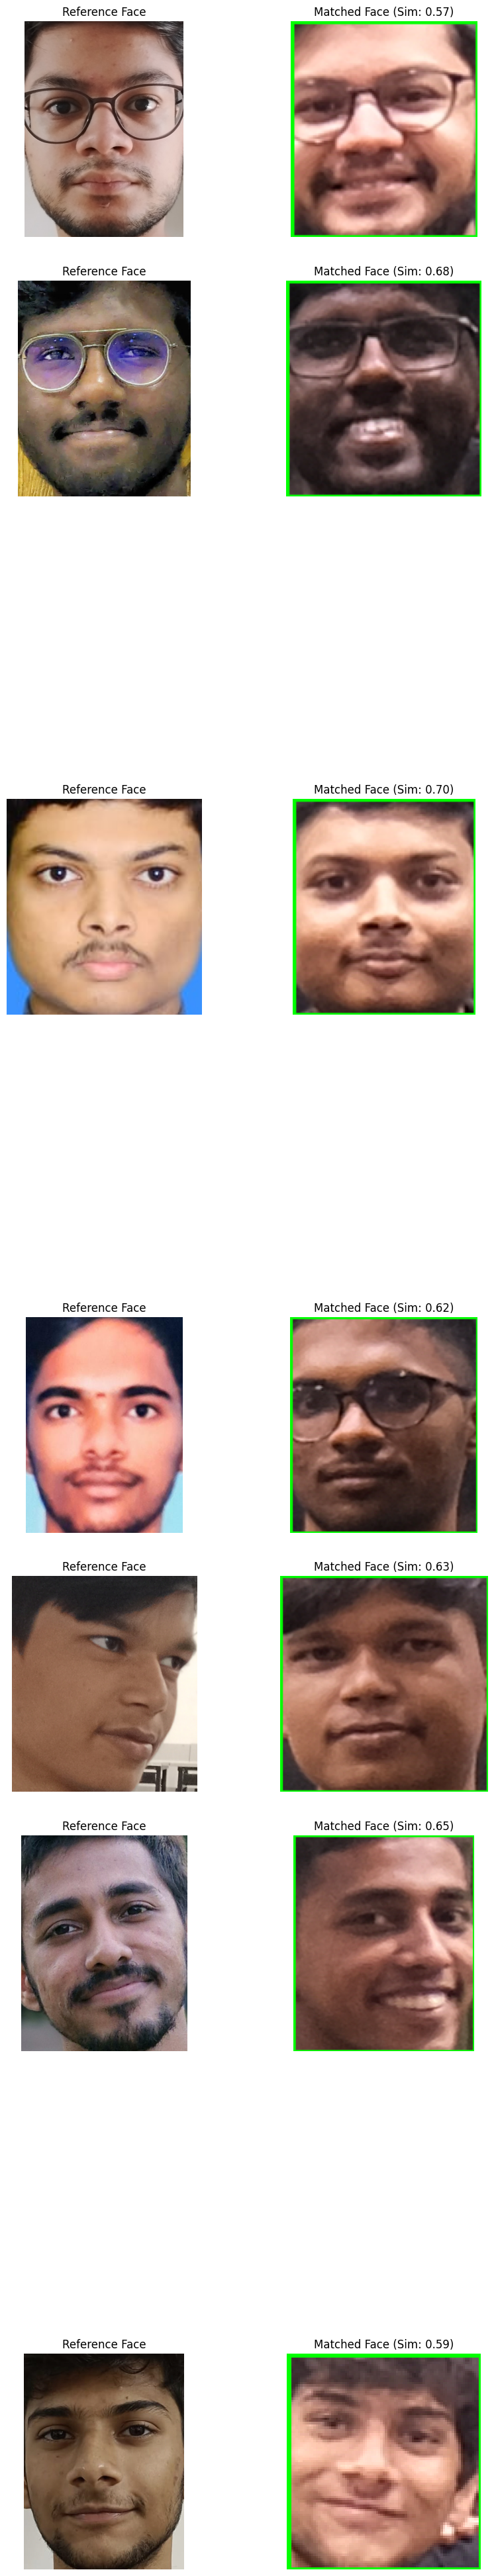

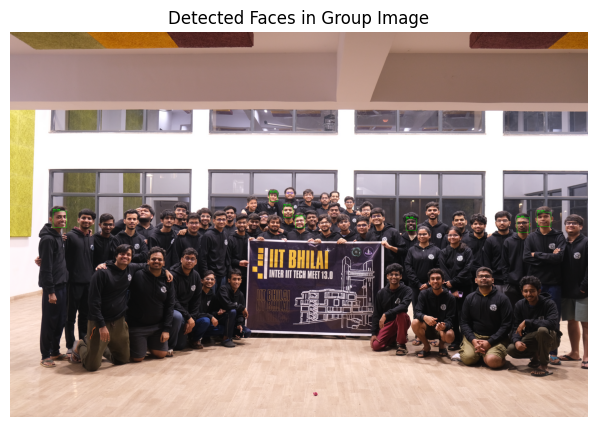

[(array([3082, 1998, 3183, 2115]), 0.56650347),
 (array([4276, 2017, 4389, 2142]), 0.6758959),
 (array([2951, 1880, 3054, 2002]), 0.7048024),
 (array([5473, 2006, 5609, 2163]), 0.6232247),
 (array([5691, 1946, 5840, 2101]), 0.62557757),
 (array([ 464, 1934,  611, 2110]), 0.6454048),
 (array([2804, 1734, 2891, 1831]), 0.58835995)]

In [ ]:
files = ["/content/faces/HP1_12240520_Dhananjay_Abbot_pic - DHANANJAY ABBOT.jpg","/content/faces/HP1_12241290_Pradeep_J.jpg","/content/faces/HP1_12241430_RAJ_MOHAMMAD - RAJ MOHAMMAD.jpg","/content/faces/HP1_12342060_Sidhesh_Kumar_Patra_Photo.pdf - SIDHESH KUMAR PATRA.jpg","/content/faces/HP1_M24MT006_R_C_Yajour_Kichenamourty - R C YAJOUR KICHENAMOURTY.jpeg","/content/faces/HP2_12240360_HariCharanGoud_B_img - B HARI CHARAN GOUD.jpg","/content/faces/HP2_12241920_Ujjwal_Raj_img - UJJWAL RAJ.jpg","/content/faces/HP3_12241520_Rohan_Kumar_Mishra - ROHAN KUMAR MISHRA.jpg","/content/faces/HP3_12241910_UDAY_BHARDWAJ_pic - Uday Bhardwaj.jpeg","/content/faces/HP3_12242000_Vedansh_Sharma_pic - VEDANSH SHARMA.jpeg"]
print("Files in folder:", files)


group_img = "/content/DSCF3076.JPG"   # Change to your group image path

match_faces(group_img,files)